In [1]:
import h5py
import numpy as np
import os 

fname = 'images/image_0005.h5' # 这是保存图像的.h5文件
if os.path.exists(fname): # 检查文件是否存在
    print(fname)

images/image_0005.h5


In [2]:
f = h5py.File(fname) # 用h5py包读取该文件
f_array = np.array(f['data']) # 读取'data'组的内容，并转换成numpy array
print(f_array)

[[117 122 118 ... 110 120 136]
 [131 100 127 ... 116 128 135]
 [113 112 120 ... 116 138 127]
 ...
 [142 151 121 ... 113 130 133]
 [122 134 113 ... 123 129 125]
 [130 121 137 ... 121 121 115]]


In [3]:
import matplotlib.pyplot as plt # 显示该图像
plt.imshow(f_array, cmap = 'gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
fname_diff = 'data/image_0003_0000.h5' # 读取另一个文件里的衍射图
if os.path.exists(fname_diff):
    print(fname_diff)

data/image_0003_0000.h5


In [5]:
f_diff = h5py.File(fname_diff)
f_diff_array = np.array(f_diff['data'])
print(f_diff_array)

[[1 3 2 ... 0 0 2]
 [2 2 0 ... 0 2 7]
 [3 0 1 ... 2 0 4]
 ...
 [1 2 4 ... 0 2 1]
 [0 1 2 ... 2 3 2]
 [3 2 5 ... 2 0 0]]


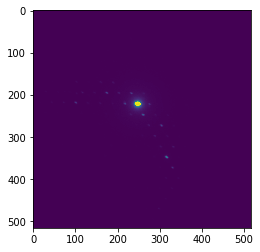

In [6]:
plt.imshow(f_diff_array) # 显示该衍射图
plt.show()

In [7]:
for group in f_diff.keys():  # 查看该h5文件中的主键类型
    print(group)

data


In [8]:
diff_name, diff_ext = os.path.splitext(fname_diff)  # 读取文件名，将文件名和扩展名分开并返回
print(diff_name, diff_ext)

data/image_0003_0000 .h5


In [9]:
diff_ext_lower = diff_ext.lower() # 改变字符串的大小写
diff_ext_upper = diff_ext.upper()
print(diff_ext_lower, diff_ext_upper)

.h5 .H5


In [10]:
f_open = open(fname_diff, 'r') # 直接用open()函数打开文件，并使用file.tell()函数查看指针目前位置
print(f_open.tell())

0


In [11]:
import glob  # glob为python自带包，用于读取文件，返回一个文件列表
fns = glob.glob(fname_diff)
print(fns)

['data/image_0003_0000.h5']


In [12]:
fns_all = glob.glob('data/image_*.h5') # 使用*通配符读取文件夹中所有.h5文件，然后显示文件数目，并显示前5个文件
print(len(fns_all), fns_all[0:5])

1107 ['data\\image_0003_0000.h5', 'data\\image_0005_0000.h5', 'data\\image_0006_0000.h5', 'data\\image_0011_0000.h5', 'data\\image_0011_0001.h5']


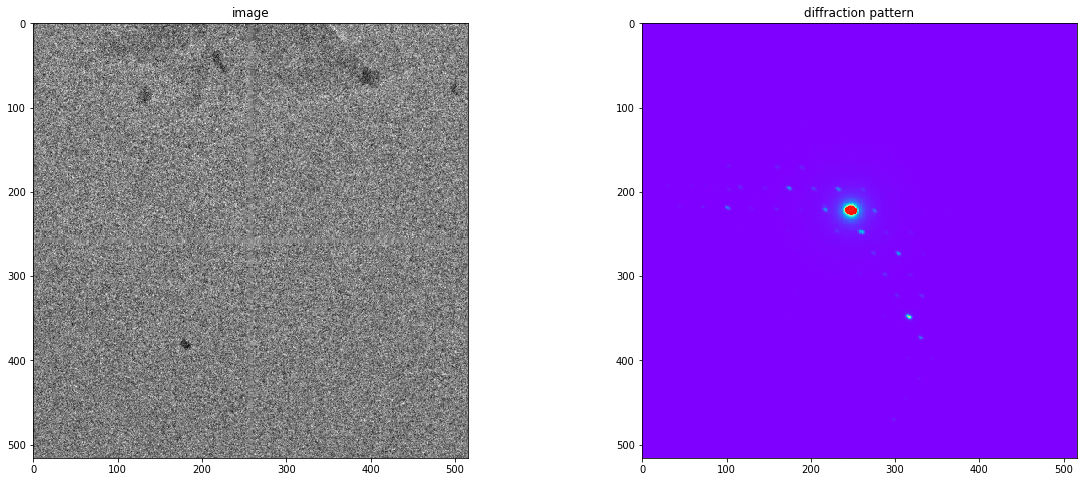

In [13]:
fig = plt.figure(figsize=(20, 8))  # 创建绘图窗口，设置图像窗口大小
# fig.canvas.set_window_title('problematic')  # 好像不起作用
ax1 = plt.subplot(121, title = 'image') # 设置子图，设置子图标题
im1 = ax1.imshow(f_array, cmap = 'gray') # 设置子图显示内容以及显示模式
ax2 = plt.subplot(122, title = 'diffraction pattern') # 同上
im2 = ax2.imshow(f_diff_array, cmap = 'rainbow')


In [18]:
%matplotlib nbagg  # 开启matplotlib后端
import hyperspy.api as hs  # 导入hyperspy API

In [19]:
dir(hs) # 显示hyperspy中的函数

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_logger',
 'datasets',
 'eds',
 'get_configuration_directory_path',
 'hyperspy',
 'interactive',
 'load',
 'logging',
 'markers',
 'material',
 'model',
 'model_selection',
 'plot',
 'preferences',
 'print_known_signal_types',
 'roi',
 'samfire',
 'set_log_level',
 'signals',
 'stack',
 'transpose']

In [20]:
dir(hs.signals) # 显示hyperspy中的函数

['BaseSignal',
 'ComplexSignal',
 'ComplexSignal1D',
 'ComplexSignal2D',
 'DielectricFunction',
 'EDSSEMSpectrum',
 'EDSTEMSpectrum',
 'EELSSpectrum',
 'HologramImage',
 'Signal1D',
 'Signal2D',
 '_EXTENSIONS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_g',
 '_signal',
 '_specs']

In [21]:
hs_diff_signal = hs.signals.Signal2D(f_diff_array)  # 将f_diff_array转换成Signal2D对象

In [22]:
dir(hs.signals.Signal2D)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__call__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__next__',
 '__or__',
 '__pos__',
 '__pow__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rshift__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_additional_slicing_targets',
 '_alias_signal_types',
 '_apply_function_on_data_and_remove_axis',
 '_assign_subclass',
 '_auto_

<IPython.core.display.Javascript object>


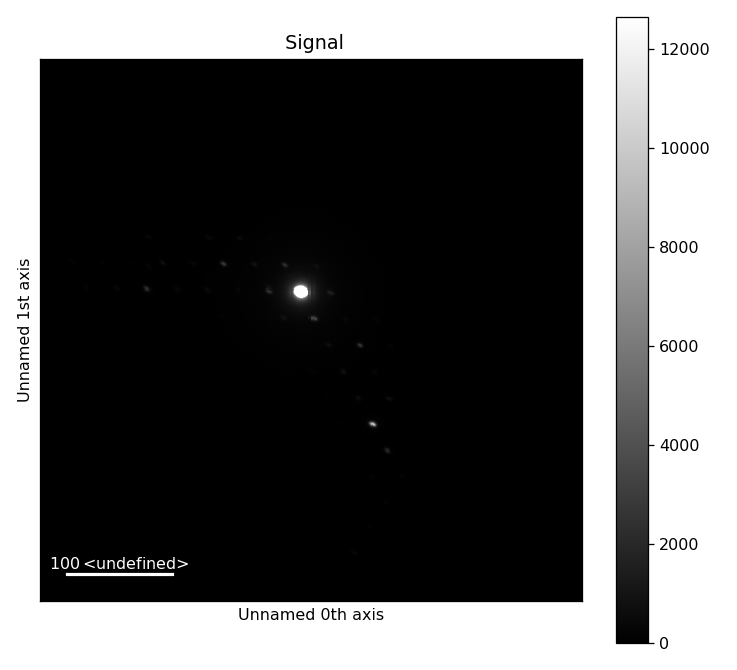

In [23]:
hs_diff_signal.plot() # 显示图像

In [24]:
hs_diff_signal.print_summary_statistics() # 打印统计信息

Summary statistics
------------------
mean:	39.1
std:	323

min:	0
Q1:	5
median:	12
Q3:	22
max:	1.3e+04


In [34]:
pixelsize = 0.015 # 设置 X, Y轴以及标尺等信息

hs_diff_signal.axes_manager[0].name = "frame"
hs_diff_signal.axes_manager[1].name = "X"
hs_diff_signal.axes_manager[1].units = "$A^{-1}$"
hs_diff_signal.axes_manager[0].scale = pixelsize



<IPython.core.display.Javascript object>


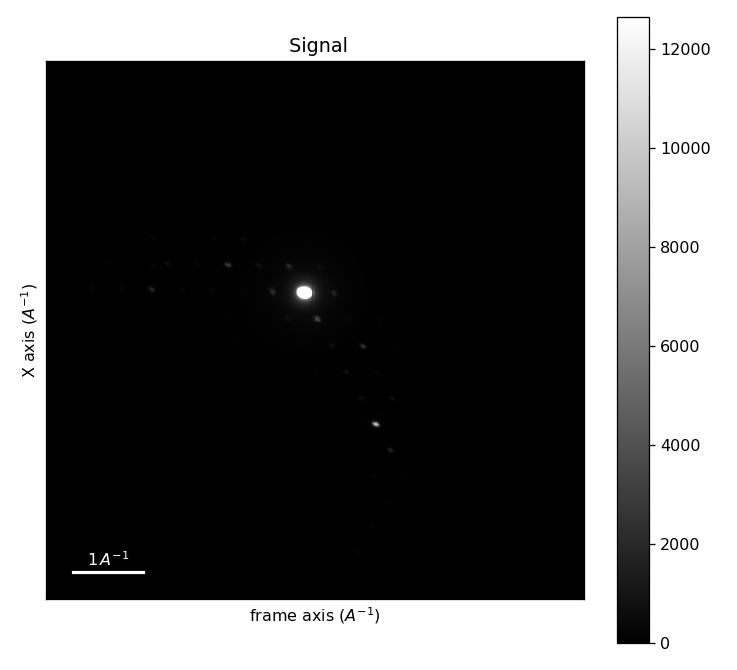

In [35]:
hs_diff_signal.plot()